In [1]:
''
import os
os.chdir('drive/My Drive/Colab Notebooks/Handwritten_digit_recognition')
del os
''

''

In [0]:
from tensorflow.keras.datasets.mnist import load_data

In [3]:
(train_images,train_labels),(test_images,test_labels)=load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


image data shown below .it is in form of int values show 28x28 pixel value
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253
  253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252
  252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252
  252 252 252 252  59   0   0   

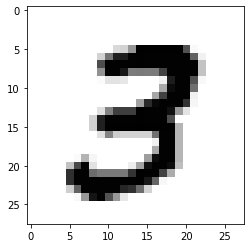

In [5]:
import matplotlib.pyplot as plt
print("image data shown below .it is in form of int values show 28x28 pixel value")
print(train_images[7])
print(train_images.shape,train_images[0].shape)
plt.imshow(train_images[7],cmap=plt.cm.binary)
plt.show()

In [6]:
import numpy as np
new_train_labels=np.empty((60000,4))
for i in range(60000):
  binary=bin(int(train_labels[i])).split('b')[1]
  new_train_labels[i]=np.array( list('0'*(4-len(binary))+binary)  )
print(new_train_labels.shape)
print(new_train_labels[1])

new_test_labels=np.empty((10000,4))
for i in range(10000):
  binary=bin(int(test_labels[i])).split('b')[1]
  new_test_labels[i]=np.array( list('0'*(4-len(binary))+binary)  )
print(new_test_labels.shape)
print(new_test_labels[1])


(60000, 4)
[0. 0. 0. 0.]
(10000, 4)
[0. 0. 1. 0.]


In [0]:
train_images=train_images/255
test_image=test_images/255

In [0]:
import numpy as np
train_images=np.reshape(train_images,(60000,28,28,1))
test_images=np.reshape(test_images,(10000,28,28,1))
del np

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D 
from tensorflow.keras.callbacks import ModelCheckpoint

In [0]:
name='model6'
import os 
try:
  os.mkdir(name)
except:
  pass


In [0]:
model=Sequential()
model.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(16,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(8,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(4,activation='relu'))


In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
filepath=name+"/weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history=model.fit(train_images,new_train_labels,validation_data=(test_images,new_test_labels),callbacks=callbacks_list,epochs=50,batch_size=20)

Epoch 1/50
3000/3000 [==============================] - ETA: 0s - loss: 0.6552 - accuracy: 0.4393
Epoch 00001: val_accuracy improved from -inf to 0.63580, saving model to model6/weights.hdf5
3000/3000 [==============================] - 101s 34ms/step - loss: 0.6552 - accuracy: 0.4393 - val_loss: 3.1991 - val_accuracy: 0.6358
Epoch 2/50
2999/3000 [============================>.] - ETA: 0s - loss: 0.1966 - accuracy: 0.6530
Epoch 00002: val_accuracy improved from 0.63580 to 0.69890, saving model to model6/weights.hdf5
3000/3000 [==============================] - 102s 34ms/step - loss: 0.1966 - accuracy: 0.6530 - val_loss: 1.5985 - val_accuracy: 0.6989
Epoch 3/50
2999/3000 [============================>.] - ETA: 0s - loss: 0.1861 - accuracy: 0.6925
Epoch 00003: val_accuracy improved from 0.69890 to 0.73540, saving model to model6/weights.hdf5
3000/3000 [==============================] - 101s 34ms/step - loss: 0.1861 - accuracy: 0.6925 - val_loss: 0.9476 - val_accuracy: 0.7354
Epoch 4/50
30

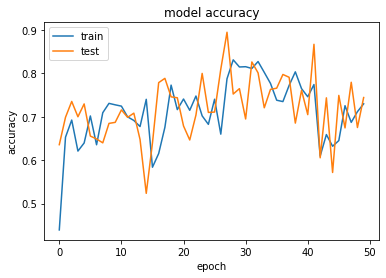

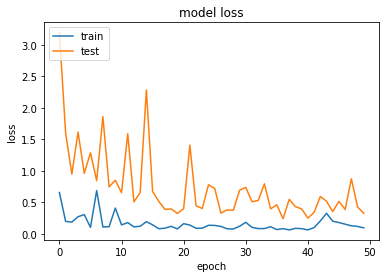

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file=name+'/'+name+'.png')
del plot_model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(name+'/test_vs_train_accuracy.jpg')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(name+'/test_vs_train_loss.jpg')
plt.show()
del plt

In [0]:
del model